### Problem 1
Develop a program using a python programming language and implement the steepest descent method to locate the minimum of 

$$ f(x,y)=-8x+x^2+12y+4y^4-2xy \tag{1}$$

using initial guesses $x=0$ and $y=0$. Make a contour plot for $-4\leq x\leq10$ and $-4\leq y\leq 4$, depict specific levels $-15, -5, -0.05, 0, 10$ of the function $f$ and a single point corresponding to the minimum of $f(x,y)$ found using your implementation of the steepest descent method. 

In [155]:
#1.1
def f(x,y):
    return -8*x+x**2+12*y+4*y**4-2*x*y
def dfdx(x0,y0):
    return -8+2*x0-2*y0
def dfdy(x0,y0):
    return 12+16*y0**3-2*x0
def findx(x0,y0,h):
    return x0-dfdx(x0,y0)*h
def findy(x0,y0,h):
    return y0-dfdy(x0,y0)*h
def xyopt(x0,y0,h):
    x=findx(x0,y0,h)
    y=findy(x0,y0,h)
    while abs(x-x0) and abs(y-y0)>0.000001:
        x0=x
        y0=y
        x=findx(x0,y0,h)
        y=findy(x0,y0,h)
    fval=f(x,y)    
    return x,y,fval

In [156]:
#1.2
xopt,yopt,f=xyopt(0,0,0.01)
print(f'{xopt,yopt,f}')

(3.303537081511352, -0.6959383717224442, -18.329780391665885)


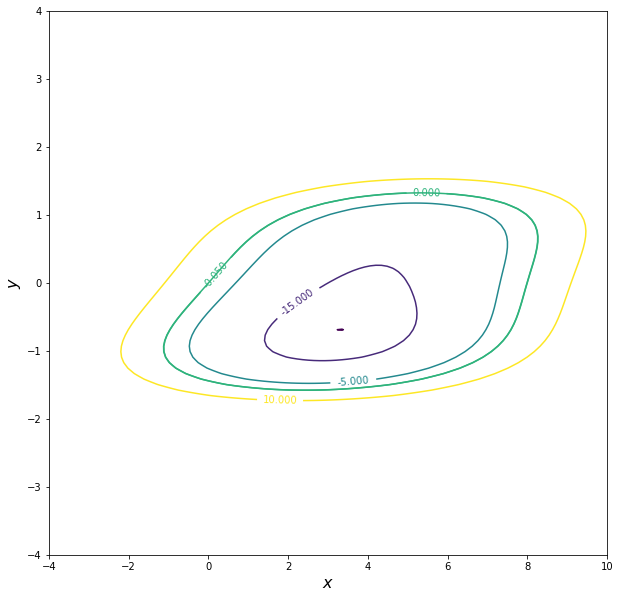

In [154]:
#1.3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-4,10,100)
y=np.linspace(-4,4,100)
plt.figure(figsize=(10, 10))
X, Y = np.meshgrid(x,y) 
S=f(X,Y) 
CS=plt.contour(X, Y, S,[-18.32,-15,-5,-0.05,0,10])
plt.clabel(CS)
plt.xlabel('$x$',size=16)
plt.ylabel('$y$',size=16)

plt.show()

## Problem 2
<b>1)</b> Use python to implement the least-square regression where your model function is a second-order polynomial:

$$ f(x)=a_0+a_1x+a_2x^2 \tag{2} $$

<b>2)</b> Fit the following data:

|x| 0.30 | 0.50 |0.77|0.98|1.55|2.20|2.50|3.00|3.60|4.10|
|---|---|---|---|---|---|---|---|---|---|---|
|y|7.49|10.03|13.78|17.70| 23.00 | 26.45 |23.48|23.68|15.28|7.79|

with a parabola described by the model $f(x)$ in Eq.(2). Determine $a_0$, $a_1$ and $a_2$ coefficients.

<b>3)</b> Make a scatter plot of the data presented in 2) and show the regression curve $f(x)$ on the same graph. Choose $x$ in $[0,4.5]$ range. 

In [140]:
#2.1
import numpy as np
from numpy import linalg as la
def leastsquare(x,y,n):
    sumx=0
    sumy=0
    sum2x=0
    sum3x=0
    sum4x=0
    sumxy=0
    sum2xy=0
    for i in range(0,n):
        sumx=sumx+x[i]
        sumy=sumy+y[i]
        sum2x=sum2x+x[i]**2
        sum3x=sum3x+x[i]**3
        sum4x=sum4x+x[i]**4
        sumxy=sumxy+x[i]*y[i]
        sum2xy=sum2xy+x[i]**2*y[i]
    meanx=sumx/n
    meany=sumy/n
    X=np.array([[len(x),sumx,sum2x],[sumx,sum2x,sum3x],[sum2x,sum3x,sum4x]])
    b=np.array([sumy,sumxy,sum2xy])
    a=la.solve(X,b)
    return a

In [141]:
#2.2
x=np.array([0.3,0.5,0.77,0.98,1.55,2.2,2.5,3.0,3.6,4.1], float)
y=np.array([7.49,10.03,13.78, 17.7, 23.0, 26.45, 23.48, 23.68, 15.28,7.79],float)
a=leastsquare(x,y,len(x))
print(f'y={round(a[0],5)}+{round(a[1],5)}x{round(a[2],5)}x^2')

y=0.41793+22.39858x-5.02756x^2


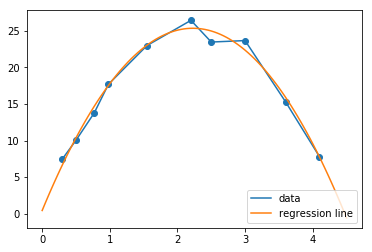

In [143]:
#2.3
def f(x,a):
    return a[0]+a[1]*x+a[2]*x**2
import matplotlib.pyplot as plt
x=np.array([0.3,0.5,0.77,0.98,1.55,2.2,2.5,3.0,3.6,4.1], float)
y=np.array([7.49,10.03,13.78, 17.7, 23.0, 26.45, 23.48, 23.68, 15.28,7.79],float)
a=leastsquare(x,y,len(x))
x1=np.linspace(0,4.5,100)
plt.scatter(x,y)
plt.plot(x,y, label="data")
plt.plot(x1,f(x1,a), label="regression line")
plt.legend(loc='lower right', fontsize='10')

## Problem 3
Fit linear splines

$$f(x)=f(x_0)+m_0(x-x_0) \qquad x_0\leq x\leq x_1$$

$$f(x)=f(x_1)+m_1(x-x_1) \qquad x_1\leq x\leq x_2$$
$$.$$
$$. \tag{3}$$
$$.$$

$$f(x)=f(x_{n-2})+m_{n-2}(x-x_{n-2}) \qquad x_{n-2}\leq x\leq x_{n-1}$$

where 

$$m_i=\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i},\qquad i= \overline{0,n-2}. $$

to the same data used in <b>Problem 2</b>. Use the results to estimate the value at $x=3.5$. $n$ is the total number of $(x,y)$ data points. 

In [59]:
def linsp(x0,x,y):
    for i in range(0,len(x)):
        if x0>=x[i] and x0<=x[i+1]:
            j1=i
            j2=i+1
            break
    mj=(y[j2]-y[j1])/(x[j2]-x[j1])
    f=y[j1]+mj*(x0-x[j1])
    return f

In [60]:
x=np.array([0.3,0.5,0.77,0.98,1.55,2.2,2.5,3.0,3.6,4.1], float)
y=np.array([7.49,10.03,13.78, 17.7, 23.0, 26.45, 23.48, 23.68, 15.28,7.79],float)
print(f'{linsp(3.5,x,y)}')

16.68
